# Collecting data from the Spotify API
## Imports

##### We will need the following packages:
* Spotipy
    * Access to Spotify API with Python
    * Spotipy oauth for authorization
* pandas
    * Dataframes and data visualization

In [1]:
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
spotify = spotipy.Spotify(client_credentials_manager=\
                          SpotifyClientCredentials(client_id='10abcd80153e480aa1309b5782db7a0a',\
                                                   client_secret='c6c037c908344f439fe469dcfbfb8918'),\
                                                      requests_timeout=50)

## Defining playlist constants
We can use the URI data of each Spotify user and playlist to retrieve them later. We'll save this information in a 2 dimensional array called **playlistURI_List**

In [2]:
# Username and playlist URIs
my_uri = 'spotify:user:mythreya75'
bruh_uri = 'spotify:playlist:5aSx3MwComNfCHqbl5AILS'
#dftr_uri = 'spotify:playlist:64qKTfGYPzL8eOqqYrLrSy'
edm_uri = 'spotify:playlist:6n1PxIopr5Sz60VBwDGpuq'

# The longest rap playlist(415H)
carl_uri = 'spotify:user:wc167m3f2872orl0152wn1gwg'
carlsPlaylistURI = 'spotify:playlist:6Qn4VdrEu9pUrPZBVZTE6C'

# Bumps 2.0 (my playlist)
bumps = 'spotify:playlist:1iVtAjR9ZFFkTcAoOlDqpf'

# The Rap Guru playlist by J. Bond
rapGuru = 'spotify:playlist:2528sgfq9xcGXl5t3u0uxl'
jBond = 'spotify:user:1252421638'

# Adding Evolution of Rap by chrisdaniels503
evolRap = 'spotify:playlist:4OfrDE8E2uDG4LvZrVulp9'
chrisd = 'spotify:user:chrisdaniels503'

# The Longest Rap Mix by Shay Kyser
shay = 'spotify:user:22nd4b3lwdmz2ofxgrgsdwiiq'
rapMix = 'spotify:playlist:17jpHzURZPYRY91mMsNWX4'

# Every tupac song by Sion
sion_uri = 'spotify:user:kz0syi26552pjbac0m4e9t2ct'
everyTupac = 'spotify:playlist:2BMe9e8C05vTFJ8cso5cwd'

# (Almost) Every 50 Cent song by TJ
tj_uri = 'spotify:user:r2ggj4my8d3claivbm5ecrwa6'
fifty = 'spotify:playlist:0yqWCwcqLzEYxN9GfiBw0T'

# Every Eminem song by Braxton Powers
braxton = 'spotify:user:go9q1qbwz4r0lr17i6sgwoz27'
em = 'spotify:playlist:6RM9tl0lQFv5QwyqL8SI3D'

# All Drake Songs On Spotify
bandicoot = 'spotify:user:benbellenger'
drakeSongs = 'spotify:playlist:7b46c5syjtG86a77R7SnMs'

# Htirbd by Kev
saintkev = 'spotify:user:ksamraj15'
htirbd = 'spotify:playlist:2vT3Hk2DmjUmjpf8tqExu5'

# The longest, Best Rap Playlist of All Time by Andy Arson Newton
andy = 'spotify:user:1236304360'
bestRap = 'spotify:playlist:1jbE9QFLknBMs1CJaAhLCC'

# List of playlists for getAllTracks to iterate through 
#playlistURI_List = [[bruh_uri, my_uri],[edm_uri, my_uri]]

playlistURI_List = [[carlsPlaylistURI, carl_uri],[bumps, my_uri],\
                    [rapGuru, jBond], [evolRap, chrisd], [rapMix, shay],\
                    [everyTupac, sion_uri], [fifty, tj_uri], [em, braxton], \
                    [drakeSongs, bandicoot], [htirbd, saintkev], [bestRap, andy]]

## Retrieving playlist data
We can create three functions to actually retrieve the feature data of all the tracks in all the playlists of playlistURI_List:
* **getAllTracks**
    * Iterates through playlistURI_List and calls findTrackFeatures on each playlist
* **findTrackFeatures**
    * Finds the individual features for each song in a given playlist by calling findTrackFeatures
* **get_playlist_tracks**
    * Helper to findTrackFeatures to find the individual features for each song

In [ ]:
def get_playlist_tracks(username,playlist_id):
    results = spotify.user_playlist_tracks(username,playlist_id)
    tracks = results['items']
    while results['next']:
        results = spotify.next(results)
        tracks.extend(results['items'])
    return tracks

# Finds track features for a every song in a playlist
# Parameters => username, playlistURI
# Returns => dictionary of tracks and features 
# (track_features[track_name] = feature_data)
def findTrackFeatures(username, playlistURI):
    count = 1
    offset = 100
    playlistDict = get_playlist_tracks(username, playlistURI)
    track_features = {}
    for track in playlistDict:
        if count % offset == 0 or count == 1:
            print(f"Fetched {count}/{len(playlistDict)} songs")
        elif count == len(playlistDict):
            print(f"Fetched all songs!")
        try:  
            trackID = track['track']['id']
            track_year = track['track']['album']['release_date'][:4]
            feature_data = list(spotify.audio_features(trackID)[0].values())
            feature_data.append(track_year)
            # print(spotify.audio_features(ids)[0])
            track_features[track['track']['name']] = feature_data
            count += 1
        except: pass
    
    return track_features

# Combines track_features dictionaries for every playlist in playlistURI_list
# Parameters => playlists (list of playlists)
# Returns => every tracksAndFeatures in every playlist from input
def getAllTracks(playlists):
    all_tracks = {}
    for playlist in playlists:
        playlistURI = playlist[0]
        # Display playlist label
        print(spotify.playlist(playlist_id=playlistURI,fields="name")['name'], end=":\n")
        
        user = playlist[1]
        
        newPlaylistTrackFeatures = findTrackFeatures(user, playlistURI)
        # This syntax lets you effectively concatenate a dictionary
        # all_tracks[track name] = feature_data
        all_tracks = all_tracks | newPlaylistTrackFeatures
        print("\n")
        
    return all_tracks

tracksAndFeatures = getAllTracks(playlistURI_List)

### addPlaylist
Extra function for adding a playlist to the existing library

In [ ]:
# Add a playlist's songs to the current library

def addPlaylist(username, playlistURI, tracksWithFeatures):
    tracksWithFeatures = tracksWithFeatures | getAllTracks([[playlistURI, username]])
    return tracksWithFeatures

### Checking library size

In [4]:
len(tracksAndFeatures)

14855

## Creating dataframe
Now we'll insert the song data into a pandas dataframe with a bunch of column labels for the different features

In [11]:
# Creating dataframe
pd.set_option('display.max_rows', None)
raw_df = pd.DataFrame.from_dict(tracksAndFeatures, orient="index", columns=['danceability', 'energy','key', \
                                                                        'loudness', 'mode', 'speechiness',\
                                                                        'acousticness', 'instrumentalness', \
                                                                        'liveness', 'valence', 'tempo', 'type',\
                                                                        'id', 'uri', 'track_href', 'analysis_url',\
                                                                        'duration_ms', 'time_signature',\
                                                                        'release_year'])

### Narrowing down dataframe
Now we can find the data points that are specifically relevant to the music itself


In [16]:
spotifyFeatures = raw_df[['danceability','energy','key',\
                      'loudness','mode','speechiness',\
                      'acousticness','instrumentalness', 'liveness',\
                      'valence','tempo', 'duration_ms', 'release_year']]
#spotifyFeatures

### Year distribution of tracks

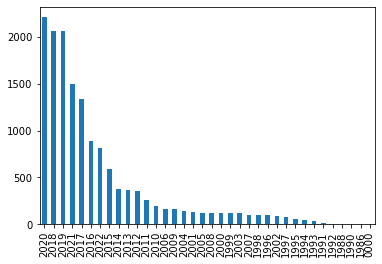

In [17]:
# Plot year distribution
yearCount = spotifyFeatures['release_year'].value_counts().plot(kind='bar', sort_columns=True)

### Exporting data to an external csv file

In [19]:
spotifyFeatures.to_csv('out.csv')

In [23]:
spotifyFeatures.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_year
Swang,0.681,0.314,8,-9.319,1,0.0581,0.2000,0.000010,0.1000,0.166,139.992,208120,2016
223's (feat. 9lokknine),0.932,0.547,0,-7.787,0,0.3330,0.0388,0.000000,0.0924,0.695,94.998,176640,2019
EARFQUAKE,0.554,0.498,9,-8.866,1,0.0685,0.2300,0.000006,0.7950,0.413,79.635,190067,2019
Sanguine Paradise,0.729,0.603,6,-6.736,0,0.0666,0.0948,0.000000,0.1130,0.207,134.972,243976,2019
Chucky Cheese,0.890,0.542,10,-4.826,0,0.3140,0.5230,0.000000,0.1230,0.565,78.458,165293,2018


In [3]:
# Ooga booga